# Visualize and Analyze the data

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pandas as pd
import seaborn as sns
from glob import glob

In [2]:
os.chdir('../results/')
glob('*.p')

['19-02-01_results_face_05.p',
 '19-02-01_results_plain_models.p',
 '19-02-01_results_face_03.p',
 '19-02-01_results_over_baseline_faces_07.p',
 '19-02-01_results_face_07.p',
 '19-01-31_results.p',
 '19-02-01_results_over_baseline_faces_05.p',
 '19-02-01_results_over_baseline_faces_03.p']

## Load all of the data

In [3]:
# (summary, context, model) = pickle.load(open( "19-01-31_results.p", "rb"))

In [4]:
(summary, context, model, metric) = pickle.load(open( '19-02-01_results_plain_models.p', "rb"))

In [5]:
print(np.shape(summary))
print(context)
print(model)
print(metric)

(6, 9, 4)
['all', 'person', 'no person', 'animal', 'electronic', 'sports']
['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'dg', 'faces']
['nss', 'sim', 'ig', 'auc']


In [6]:
(summary_f03, context_f03, model_f03, metric_f03) = pickle.load(open( '19-02-01_results_face_03.p', "rb"))
(summary_f05, context_f05, model_f05, metric_f05) = pickle.load(open( '19-02-01_results_face_05.p', "rb"))
(summary_f07, context_f07, model_f07, metric_f07) = pickle.load(open( '19-02-01_results_face_07.p', "rb"))


In [7]:
model_f03

['aim_face_03',
 'cas_face_03',
 'covsal_face_03',
 'gbvs_face_03',
 'icf_face_03',
 'ik_face_03',
 'sun_face_03']

## Get the NSS scores

In [8]:
nss_table = summary[:,:,0]
nss_f03_table = summary_f03[:,:,0]
nss_f05_table = summary_f05[:,:,0]
nss_f07_table = summary_f07[:,:,0]

## Change scores into DataFrames

In [9]:
NSS = pd.DataFrame(data=nss_table, columns=model, index=context)
NSS.columns.name='models'
NSS.index.name='context'


NSS = NSS.transpose()

faces = NSS.loc['faces']
dg = NSS.loc['dg']
NSS = NSS.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

NSS

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.695415,0.750022,0.606893,0.634023,0.612062,0.904362
cas,0.699232,0.751214,0.614966,0.598501,0.602891,0.916443
covsal,0.808601,0.858434,0.727820,0.799353,0.676901,0.994663
gbvs,0.930722,0.981991,0.847613,0.866363,0.818153,1.175780
icf,0.750453,0.798573,0.672449,0.703392,0.680108,0.827598
ik,0.609094,0.656248,0.532654,0.570222,0.548264,0.825519
sun,0.381636,0.374716,0.392854,0.231857,0.342912,0.381378


In [10]:
NSS['mean context'] = NSS.mean(axis=1)
NSS = NSS.transpose()
NSS['mean model'] = NSS.mean(axis=1)
NSS = NSS.transpose()
NSS

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.695415,0.750022,0.606893,0.634023,0.612062,0.904362,0.700463
cas,0.699232,0.751214,0.614966,0.598501,0.602891,0.916443,0.697208
covsal,0.808601,0.858434,0.727820,0.799353,0.676901,0.994663,0.810962
gbvs,0.930722,0.981991,0.847613,0.866363,0.818153,1.175780,0.936770
icf,0.750453,0.798573,0.672449,0.703392,0.680108,0.827598,0.738762
ik,0.609094,0.656248,0.532654,0.570222,0.548264,0.825519,0.623667
sun,0.381636,0.374716,0.392854,0.231857,0.342912,0.381378,0.350892
mean model,0.696451,0.738743,0.627893,0.629102,0.611613,0.860820,0.694103


In [11]:
NSS_mean_model = NSS.loc['mean model']
NSS_mean_context = NSS.transpose().loc['mean context']

In [12]:
NSS_f03 = pd.DataFrame(data=nss_f03_table, columns=model_f03, index=context_f03)
NSS_f03.columns.name='models'
NSS_f03.index.name='context'

# Rename columns of the face plot
col = {'aim_face_03':'aim', 'cas_face_03':'cas', 'covsal_face_03':'covsal', 'gbvs_face_03':'gbvs',
       'icf_face_03':'icf', 'ik_10_face_03':'ik_10', 'sun_face_03':'sun', 'ik_face_03':'ik'}
NSS_f03 = NSS_f03.rename(index=str, columns=col).transpose()

NSS_f03

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.726771,0.802703,0.603681,0.646115,0.665118,0.927426
cas,0.724031,0.794266,0.609574,0.608964,0.641751,0.933882
covsal,0.844614,0.915541,0.729637,0.814085,0.733162,1.021776
gbvs,0.952308,1.017286,0.846974,0.877877,0.851408,1.190304
icf,0.776991,0.841105,0.673060,0.717625,0.714424,0.848944
ik,0.644718,0.714655,0.531347,0.582755,0.604659,0.849906
sun,0.427048,0.450776,0.388583,0.244370,0.416806,0.412040


In [13]:
NSS_f03['mean context'] = NSS_f03.mean(axis=1)
NSS_f03 = NSS_f03.transpose()
NSS_f03['mean model'] = NSS_f03.mean(axis=1)
NSS_f03 = NSS_f03.transpose()
NSS_f03

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.726771,0.802703,0.603681,0.646115,0.665118,0.927426,0.728636
cas,0.724031,0.794266,0.609574,0.608964,0.641751,0.933882,0.718745
covsal,0.844614,0.915541,0.729637,0.814085,0.733162,1.021776,0.843136
gbvs,0.952308,1.017286,0.846974,0.877877,0.851408,1.190304,0.956026
icf,0.776991,0.841105,0.673060,0.717625,0.714424,0.848944,0.762025
ik,0.644718,0.714655,0.531347,0.582755,0.604659,0.849906,0.654673
sun,0.427048,0.450776,0.388583,0.244370,0.416806,0.412040,0.389937
mean model,0.728069,0.790905,0.626122,0.641684,0.661047,0.883468,0.721883


In [14]:
NSS_f03_mean_model = NSS_f03.loc['mean model']
NSS_f03_mean_context = NSS_f03.transpose().loc['mean context']

In [15]:
NSS_f05 = pd.DataFrame(data=nss_f05_table, columns=model_f05, index=context_f05)
NSS_f05.columns.name='models'
NSS_f05.index.name='context'

# Rename columns of the face plot
col = {'aim_face_05':'aim', 'cas_face_05':'cas', 'covsal_face_05':'covsal', 'gbvs_face_05':'gbvs',
       'icf_face_05':'icf', 'ik_10_face_05':'ik_10', 'sun_face_05':'sun', 'ik_face_05':'ik'}
NSS_f05 = NSS_f05.rename(index=str, columns=col).transpose()

NSS_f05

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.751993,0.843119,0.604273,0.655431,0.702635,0.946604
cas,0.749544,0.834213,0.612289,0.620550,0.683569,0.948357
covsal,0.871282,0.957498,0.731522,0.826974,0.773809,1.043873
gbvs,0.969970,1.045364,0.847754,0.887882,0.877220,1.199123
icf,0.794886,0.869942,0.673215,0.727519,0.735561,0.859675
ik,0.672653,0.759661,0.531609,0.593539,0.646299,0.865729
sun,0.466713,0.514570,0.389136,0.263813,0.473598,0.446995


In [16]:
NSS_f05['mean context'] = NSS_f05.mean(axis=1)
NSS_f05 = NSS_f05.transpose()
NSS_f05['mean model'] = NSS_f05.mean(axis=1)
NSS_f05 = NSS_f05.transpose()
NSS_f05

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.751993,0.843119,0.604273,0.655431,0.702635,0.946604,0.750676
cas,0.749544,0.834213,0.612289,0.620550,0.683569,0.948357,0.741420
covsal,0.871282,0.957498,0.731522,0.826974,0.773809,1.043873,0.867493
gbvs,0.969970,1.045364,0.847754,0.887882,0.877220,1.199123,0.971219
icf,0.794886,0.869942,0.673215,0.727519,0.735561,0.859675,0.776800
ik,0.672653,0.759661,0.531609,0.593539,0.646299,0.865729,0.678249
sun,0.466713,0.514570,0.389136,0.263813,0.473598,0.446995,0.425804
mean model,0.753863,0.832052,0.627114,0.653673,0.698956,0.901479,0.744523


In [17]:
NSS_f05_mean_model = NSS_f05.loc['mean model']
NSS_f05_mean_context = NSS_f05.transpose().loc['mean context']

In [18]:
NSS_f07 = pd.DataFrame(data=nss_f07_table, columns=model_f07, index=context_f07)
NSS_f07.columns.name='models'
NSS_f07.index.name='context'

# Rename columns of the face plot
col = {'aim_face_07':'aim', 'cas_face_07':'cas', 'covsal_face_07':'covsal', 'gbvs_face_07':'gbvs',
       'icf_face_07':'icf', 'ik_10_face_07':'ik_10', 'sun_face_07':'sun', 'ik_face_07':'ik'}
NSS_f07 = NSS_f07.rename(index=str, columns=col).transpose()

NSS_f07

context,all,person,no person,animal,electronic,sports
models,,,,,,
aim,0.765826,0.865497,0.604252,0.656729,0.719146,0.954633
cas,0.771458,0.869309,0.612838,0.629839,0.715841,0.957294
covsal,0.882585,0.975002,0.732773,0.834294,0.790723,1.055998
gbvs,0.979199,1.059780,0.848574,0.896216,0.890499,1.195571
icf,0.803146,0.883573,0.672770,0.732652,0.741859,0.858524
ik,0.689479,0.787104,0.531223,0.601158,0.667458,0.872764
sun,0.496638,0.563304,0.388569,0.282352,0.512007,0.480026


In [19]:
NSS_f07['mean context'] = NSS_f07.mean(axis=1)
NSS_f07 = NSS_f07.transpose()
NSS_f07['mean model'] = NSS_f07.mean(axis=1)
NSS_f07 = NSS_f07.transpose()
NSS_f07

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.765826,0.865497,0.604252,0.656729,0.719146,0.954633,0.761014
cas,0.771458,0.869309,0.612838,0.629839,0.715841,0.957294,0.759430
covsal,0.882585,0.975002,0.732773,0.834294,0.790723,1.055998,0.878562
gbvs,0.979199,1.059780,0.848574,0.896216,0.890499,1.195571,0.978307
icf,0.803146,0.883573,0.672770,0.732652,0.741859,0.858524,0.782087
ik,0.689479,0.787104,0.531223,0.601158,0.667458,0.872764,0.691531
sun,0.496638,0.563304,0.388569,0.282352,0.512007,0.480026,0.453816
mean model,0.769762,0.857653,0.627286,0.661891,0.719648,0.910687,0.757821


In [20]:
NSS_f07_mean_model = NSS_f07.loc['mean model']
NSS_f07_mean_context = NSS_f07.transpose().loc['mean context']

## Create Mean Matrices

In [21]:
mean_models = pd.DataFrame([NSS_mean_model, NSS_f03_mean_model, NSS_f05_mean_model, NSS_f07_mean_model], index=[0,0.3,0.5,0.7])

mean_models = mean_models.transpose()
mean_models = mean_models.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]
mean_models

,0.0,0.3,0.5,0.7
context,,,,
all,0.696451,0.728069,0.753863,0.769762
person,0.738743,0.790905,0.832052,0.857653
no person,0.627893,0.626122,0.627114,0.627286
animal,0.629102,0.641684,0.653673,0.661891
electronic,0.611613,0.661047,0.698956,0.719648
sports,0.860820,0.883468,0.901479,0.910687


In [22]:
mean_contexts = pd.DataFrame([NSS_mean_context, NSS_f03_mean_context, NSS_f05_mean_context, NSS_f07_mean_context], index=[0,0.3,0.5,0.7])
mean_contexts

models,aim,cas,covsal,gbvs,icf,ik,sun,mean model
0.0,0.700463,0.697208,0.810962,0.936770,0.738762,0.623667,0.350892,0.694103
0.3,0.728636,0.718745,0.843136,0.956026,0.762025,0.654673,0.389937,0.721883
0.5,0.750676,0.741420,0.867493,0.971219,0.776800,0.678249,0.425804,0.744523
0.7,0.761014,0.759430,0.878562,0.978307,0.782087,0.691531,0.453816,0.757821


In [23]:
mean_contexts = mean_contexts.transpose()
mean_contexts = mean_contexts.loc[['aim', 'cas', 'gbvs', 'icf', 'ik', 'sun']]
mean_contexts

,0.0,0.3,0.5,0.7
models,,,,
aim,0.700463,0.728636,0.750676,0.761014
cas,0.697208,0.718745,0.741420,0.759430
gbvs,0.936770,0.956026,0.971219,0.978307
icf,0.738762,0.762025,0.776800,0.782087
ik,0.623667,0.654673,0.678249,0.691531
sun,0.350892,0.389937,0.425804,0.453816


## Vizualization

### Data Prep

In [24]:
NSS0 = NSS.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
NSS0 = NSS0.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

NSSmean_context = NSS.transpose().loc[['mean context']]
NSSmean_context = NSSmean_context.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

NSSmean_model = NSS.loc[['mean model']]
NSSmean_model = NSSmean_model.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [25]:
NSS0_f03 = NSS_f03.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
NSS0_f03 = NSS0_f03.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

NSSmean_context_f03 = NSS_f03.transpose().loc[['mean context']]
NSSmean_context_f03 = NSSmean_context_f03.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

NSSmean_model_f03 = NSS_f03.loc[['mean model']]
NSSmean_model_f03 = NSSmean_model_f03.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [26]:
NSS0_f05 = NSS_f05.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
NSS0_f05 = NSS0_f05.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

NSSmean_context_f05 = NSS_f05.transpose().loc[['mean context']]
NSSmean_context_f05 = NSSmean_context_f05.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

NSSmean_model_f05 = NSS_f05.loc[['mean model']]
NSSmean_model_f05 = NSSmean_model_f05.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

In [27]:
NSS0_f07 = NSS_f07.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]
NSS0_f07 = NSS0_f07.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

NSSmean_context_f07 = NSS_f07.transpose().loc[['mean context']]
NSSmean_context_f07 = NSSmean_context_f07.transpose().loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']].transpose()

NSSmean_model_f07 = NSS_f07.loc[['mean model']]
NSSmean_model_f07 = NSSmean_model_f07.transpose().loc[['all', 'person', 'no person', 'animal','electronic', 'sports']]

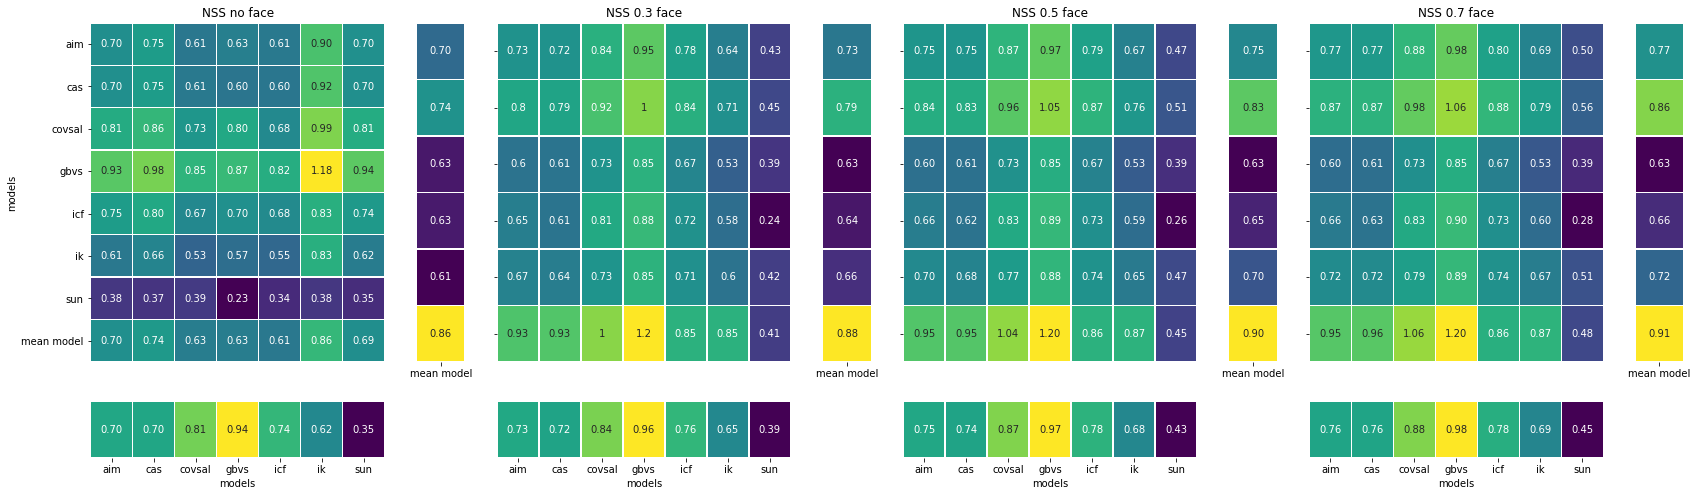

In [44]:
fig, ax = plt.subplots(figsize=(30,8))
gs = gridspec.GridSpec(2, 9,
                       width_ratios=[6, 1, 6, 1, 6, 1, 6, 1, 1],
                       height_ratios=[6, 1]
                       )

ax01 = plt.subplot(gs[0])
ax02 = plt.subplot(gs[1])
ax03 = plt.subplot(gs[9])

ax11 = plt.subplot(gs[2])
ax12 = plt.subplot(gs[3])
ax13 = plt.subplot(gs[11])

ax21 = plt.subplot(gs[4])
ax22 = plt.subplot(gs[5])
ax23 = plt.subplot(gs[13])

ax31 = plt.subplot(gs[6])
ax32 = plt.subplot(gs[7])
ax33 = plt.subplot(gs[15])

im = sns.heatmap(NSS0, annot=True, linewidths=.5, ax=ax01, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(NSSmean_model, annot=True, linewidths=.5, ax=ax02, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(NSSmean_context, annot=True, linewidths=.5, ax=ax03, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(NSS0_f03, annot=True, linewidths=.5, ax=ax11, cmap='viridis', cbar=False, xticklabels='');
sns.heatmap(NSSmean_model_f03, annot=True, linewidths=.5, ax=ax12, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(NSSmean_context_f03, annot=True, linewidths=.5, ax=ax13, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(NSS0_f05, annot=True, linewidths=.5, ax=ax21, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(NSSmean_model_f05, annot=True, linewidths=.5, ax=ax22, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(NSSmean_context_f05, annot=True, linewidths=.5, ax=ax23, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

sns.heatmap(NSS0_f07, annot=True, linewidths=.5, ax=ax31, cmap='viridis', cbar=False, xticklabels='', fmt='.2f');
sns.heatmap(NSSmean_model_f07, annot=True, linewidths=.5, ax=ax32, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');
sns.heatmap(NSSmean_context_f07, annot=True, linewidths=.5, ax=ax33, cmap='viridis', yticklabels='', cbar=False, fmt='.2f');

ax01.set_xlabel('');
ax02.set_ylabel('');
ax02.set_xlabel('');
ax03.set_ylabel('');

ax11.set_yticklabels('');
ax11.set_xlabel('');
ax11.set_ylabel('')
ax12.set_ylabel('');
ax12.set_xlabel('');
ax13.set_ylabel('');

ax21.set_yticklabels('');
ax21.set_xlabel('');
ax21.set_ylabel('')
ax22.set_ylabel('');
ax22.set_xlabel('');
ax23.set_ylabel('');

ax31.set_yticklabels('');
ax31.set_xlabel('');
ax31.set_ylabel('')
ax32.set_ylabel('');
ax32.set_xlabel('');
ax33.set_ylabel('');

ax01.set_title('NSS no face');
ax11.set_title('NSS 0.3 face');
ax21.set_title('NSS 0.5 face');
ax31.set_title('NSS 0.7 face');
plt.savefig('plots/NSS_sep_with_mean.jpg', bbox_inches='tight', pad_inches=0)

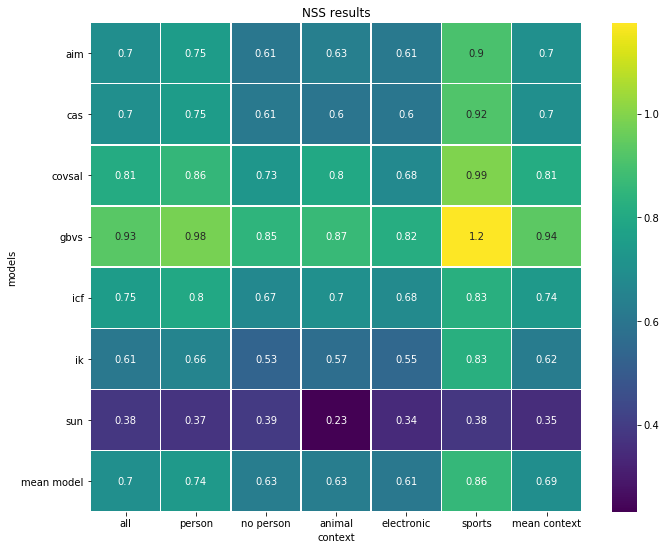

In [29]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(NSS, annot=True, linewidths=.5, ax=ax, cmap='viridis');
plt.title('NSS results');
# plt.savefig('plots/NSS_all_with_mean.jpg', bbox_inches='tight', pad_inches=0)

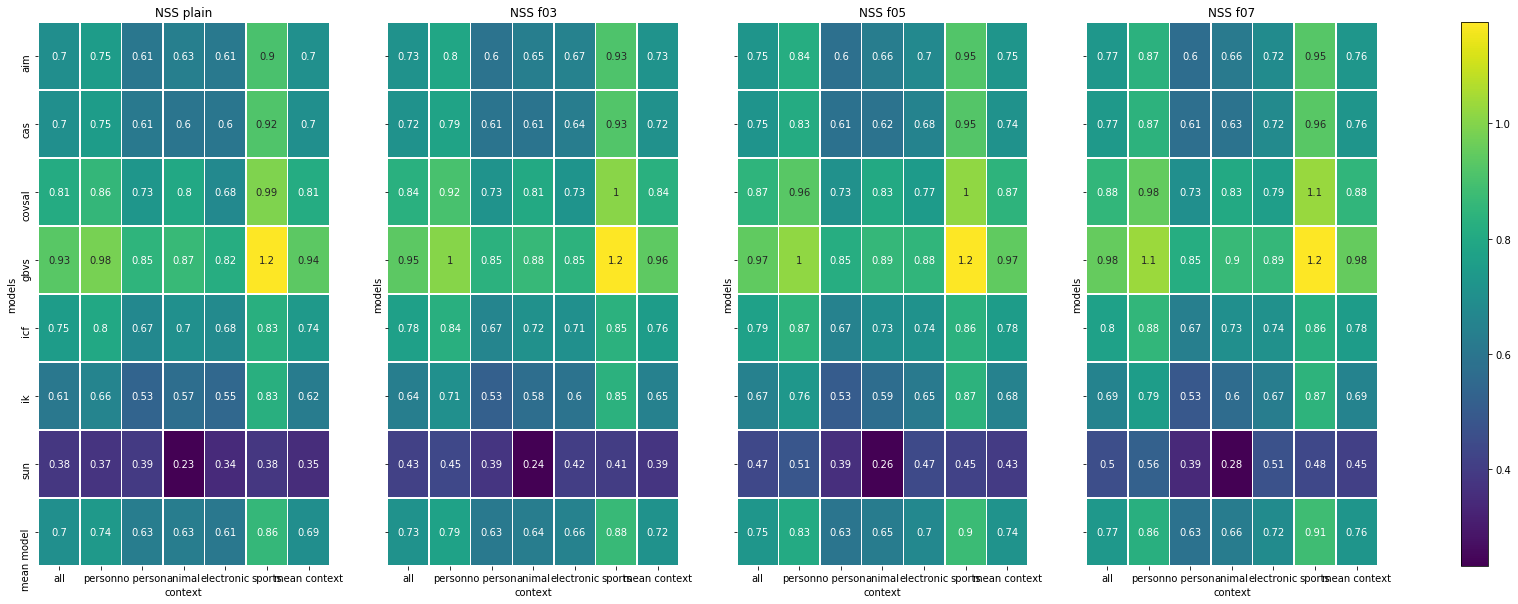

In [30]:
fig, ax = plt.subplots(1, 4,figsize=(30,10), sharex=True, sharey=True)

im = sns.heatmap(NSS, annot=True, linewidths=.5, ax=ax[0], cmap='viridis', cbar=False);
sns.heatmap(NSS_f03, annot=True, linewidths=.5, ax=ax[1], cmap='viridis', cbar=False);
sns.heatmap(NSS_f05, annot=True, linewidths=.5, ax=ax[2], cmap='viridis', cbar=False);
sns.heatmap(NSS_f07, annot=True, linewidths=.5, ax=ax[3], cmap='viridis', cbar=False);

mappable = im.get_children()[0]
# plt.colorbar(mappable, ax = ax,orientation = 'horizontal')
plt.colorbar(mappable, ax = ax);

ax[0].set_title('NSS plain');
ax[1].set_title('NSS f03');
ax[2].set_title('NSS f05');
ax[3].set_title('NSS f07');
plt.savefig('plots/NSS_sep_with_mean.jpg', bbox_inches='tight', pad_inches=0)

## Vizualization of means

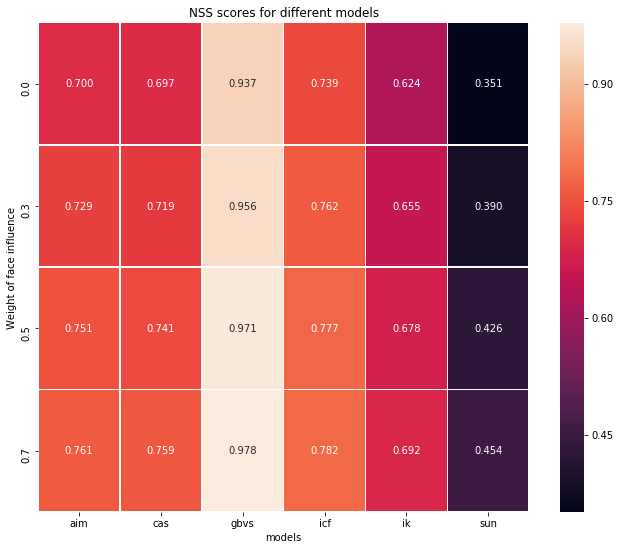

In [31]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_contexts.transpose(), annot=True, linewidths=.5, ax=ax,fmt='.3f');
plt.ylabel('Weight of face influence')
plt.title('NSS scores for different models');

plt.savefig('plots/NSS_performance_mean_contexts.jpg', bbox_inches='tight', pad_inches=0)

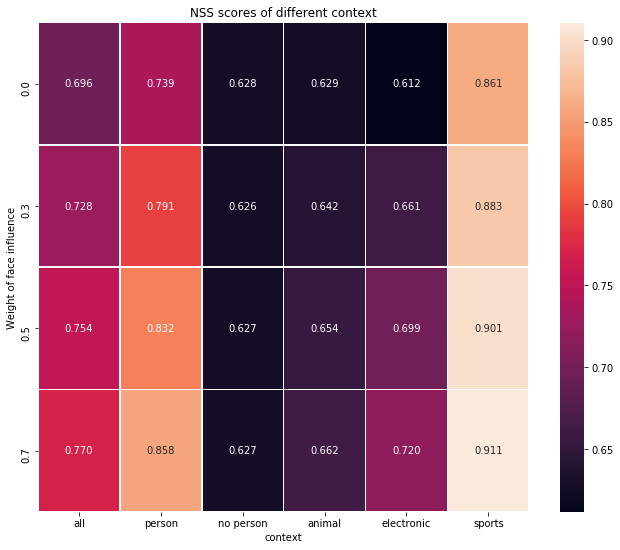

In [32]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_models.transpose(), annot=True, linewidths=.5, ax=ax,fmt='.3f');
plt.ylabel('Weight of face influence')
plt.title('NSS scores of different context');

plt.savefig('plots/NSS_performance_mean_models.jpg', bbox_inches='tight', pad_inches=0)

## Calculate the relative error

In [33]:
NSS0 = NSS.loc[['aim','cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun', 'mean model']]

In [34]:
NSS_f05

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.751993,0.843119,0.604273,0.655431,0.702635,0.946604,0.750676
cas,0.749544,0.834213,0.612289,0.620550,0.683569,0.948357,0.741420
covsal,0.871282,0.957498,0.731522,0.826974,0.773809,1.043873,0.867493
gbvs,0.969970,1.045364,0.847754,0.887882,0.877220,1.199123,0.971219
icf,0.794886,0.869942,0.673215,0.727519,0.735561,0.859675,0.776800
ik,0.672653,0.759661,0.531609,0.593539,0.646299,0.865729,0.678249
sun,0.466713,0.514570,0.389136,0.263813,0.473598,0.446995,0.425804
mean model,0.753863,0.832052,0.627114,0.653673,0.698956,0.901479,0.744523


In [35]:
NSS_f07

context,all,person,no person,animal,electronic,sports,mean context
models,,,,,,,
aim,0.765826,0.865497,0.604252,0.656729,0.719146,0.954633,0.761014
cas,0.771458,0.869309,0.612838,0.629839,0.715841,0.957294,0.759430
covsal,0.882585,0.975002,0.732773,0.834294,0.790723,1.055998,0.878562
gbvs,0.979199,1.059780,0.848574,0.896216,0.890499,1.195571,0.978307
icf,0.803146,0.883573,0.672770,0.732652,0.741859,0.858524,0.782087
ik,0.689479,0.787104,0.531223,0.601158,0.667458,0.872764,0.691531
sun,0.496638,0.563304,0.388569,0.282352,0.512007,0.480026,0.453816
mean model,0.769762,0.857653,0.627286,0.661891,0.719648,0.910687,0.757821


In [36]:
NSS_diff_f03 = ((NSS_f03 - NSS0) / NSS0)*100
NSS_diff_f05 = ((NSS_f05 - NSS0) / NSS0)*100
NSS_diff_f07 = ((NSS_f07 - NSS0) / NSS0)*100

#### Get mean of models and mean of contexts in diff out

In [37]:
mean_model_diff_f03 = NSS_diff_f03.loc['mean model']
mean_model_diff_f05 = NSS_diff_f05.loc['mean model']
mean_model_diff_f07 = NSS_diff_f07.loc['mean model']

mean_models_diff = pd.DataFrame([mean_model_diff_f03, 
                            mean_model_diff_f05,
                            mean_model_diff_f07], index=[0.3,0.5,0.7])

mean_models_diff = mean_models_diff.transpose()
mean_models_diff

,0.3,0.5,0.7
context,,,
all,4.539908,8.243589,10.526399
person,7.060910,12.630877,16.096274
no person,-0.281947,-0.124012,-0.096677
animal,2.000123,3.905759,5.212151
electronic,8.082563,14.280781,17.663878
sports,2.630979,4.723295,5.792934
mean context,4.002157,7.263973,9.179833


In [38]:
mean_context_diff_f03 = NSS_diff_f03.transpose().loc['mean context']
mean_context_diff_f05 = NSS_diff_f05.transpose().loc['mean context']
mean_context_diff_f07 = NSS_diff_f07.transpose().loc['mean context']

mean_context_diff = pd.DataFrame([mean_context_diff_f03, 
                            mean_context_diff_f05,
                            mean_context_diff_f07], index=[0.3,0.5,0.7])

mean_context_diff = mean_context_diff.transpose()
mean_context_diff

,0.3,0.5,0.7
models,,,
aim,4.022057,7.168558,8.644442
cas,3.088978,6.341333,8.924404
covsal,3.967391,6.970880,8.335858
gbvs,2.055581,3.677372,4.434003
icf,3.148866,5.148842,5.864540
ik,4.971664,8.751734,10.881494
sun,11.127285,21.348992,29.331982
mean model,4.002157,7.263973,9.179833


## Vizualize relative errors

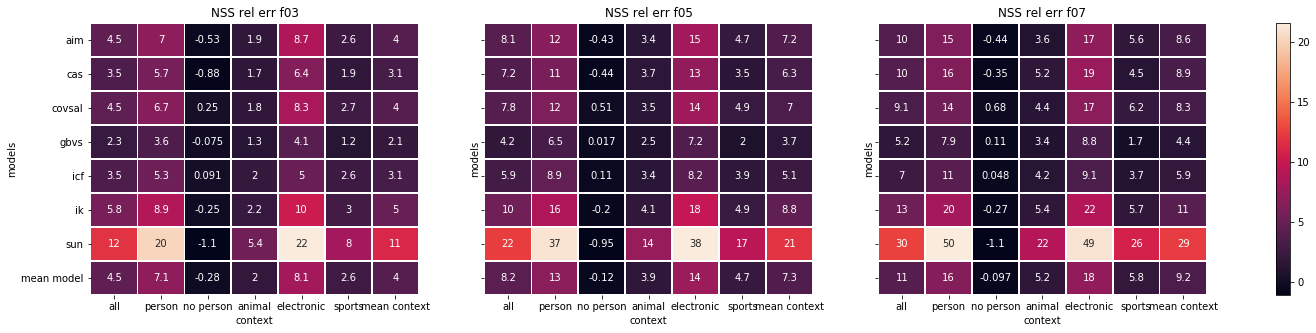

In [39]:
fig, ax = plt.subplots(1, 3,figsize=(25,5), sharex=True, sharey=True)

im = sns.heatmap(NSS_diff_f03, annot=True, linewidths=.5, ax=ax[0], cbar=False);
sns.heatmap(NSS_diff_f05, annot=True, linewidths=.5, ax=ax[1], cbar=False);
sns.heatmap(NSS_diff_f07, annot=True, linewidths=.5, ax=ax[2], cbar=False);

mappable = im.get_children()[0]
plt.colorbar(mappable, ax = ax);

ax[0].set_title('NSS rel err f03');
ax[1].set_title('NSS rel err f05');
ax[2].set_title('NSS rel err f07');
# plt.savefig('plots/nss_sep_diff_with_mean.jpg', bbox_inches='tight', pad_inches=0)

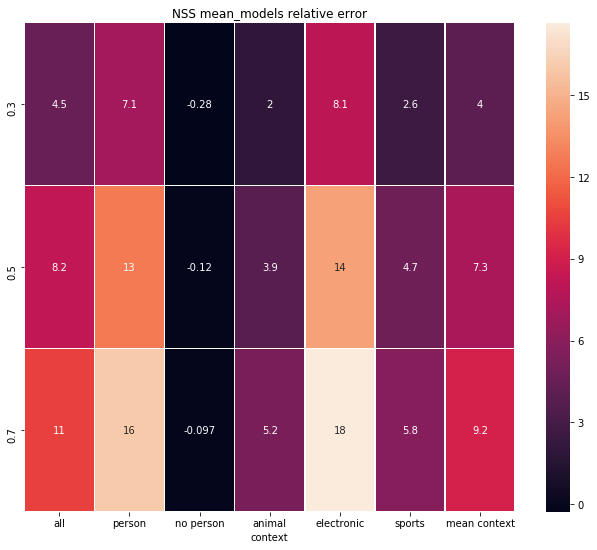

In [40]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_models_diff.transpose(), annot=True, linewidths=.5, ax=ax);
plt.title('NSS mean_models relative error');
# plt.savefig('plots/NSS_mean_models_diff.jpg', bbox_inches='tight', pad_inches=0)

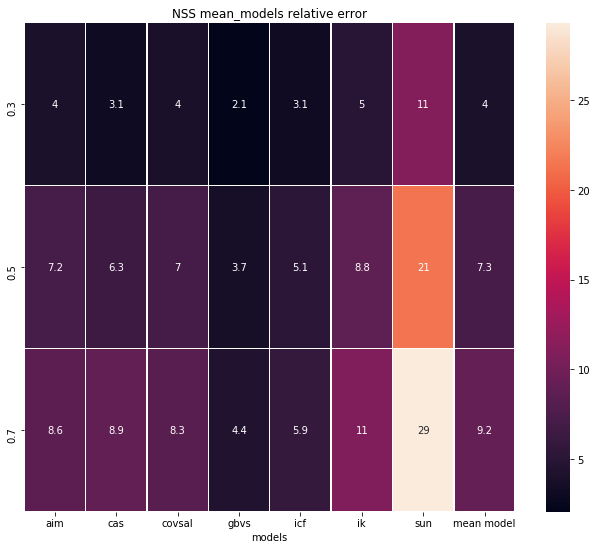

In [41]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(mean_context_diff.transpose(), annot=True, linewidths=.5, ax=ax);
plt.title('NSS mean_models relative error');
# plt.savefig('plots/NSS_mean_contexts_diff.jpg', bbox_inches='tight', pad_inches=0)

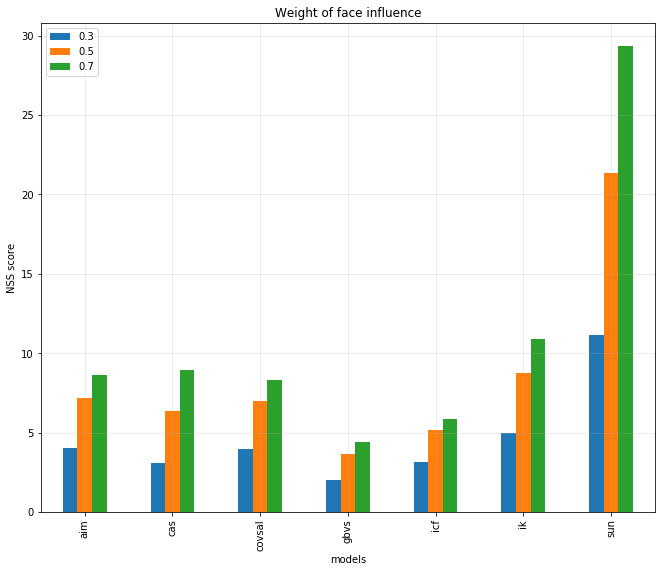

In [42]:
mean_context_diff = mean_context_diff.loc[['aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik', 'sun']]

fig, ax = plt.subplots(figsize=(11,9));
mean_context_diff.plot.bar(ax=ax);
plt.title('Weight of face influence')
plt.ylabel('NSS score');
plt.grid(alpha=0.3)


plt.savefig('plots/NSS_improvment_mean_contexts.jpg', bbox_inches='tight', pad_inches=0)

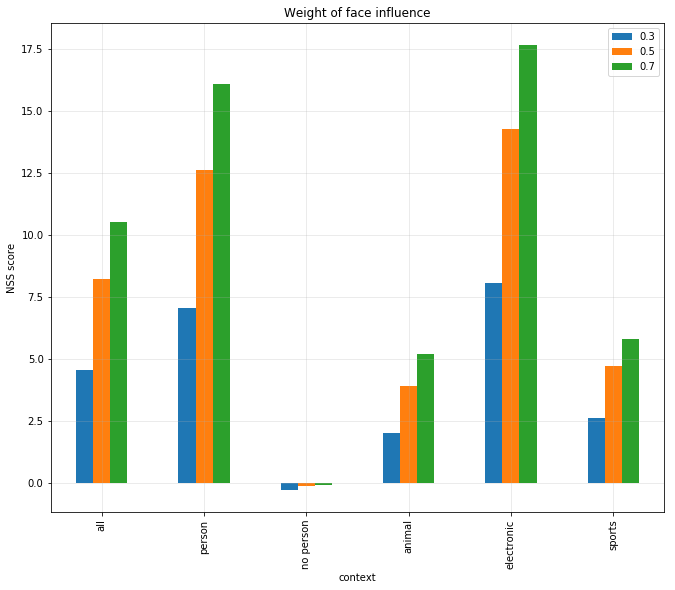

In [43]:
mean_models_diff = mean_models_diff.loc[['all', 'person', 'no person', 'animal', 'electronic', 'sports']]

fig, ax = plt.subplots(figsize=(11,9));
mean_models_diff.plot.bar(ax=ax);

plt.grid(alpha=0.3)

plt.title('Weight of face influence')
plt.ylabel('NSS score');

plt.savefig('plots/NSS_improvment_mean_model.jpg', bbox_inches='tight', pad_inches=0)